In [1]:
#Importamos librerías de pandas, nunoy y matplotlib respectivamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Lista_50_var_sin_nulos.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4293 non-null   int64  
 1   id                                            4293 non-null   int64  
 2   last_scraped                                  4293 non-null   object 
 3   host_id                                       4293 non-null   int64  
 4   host_name                                     4293 non-null   object 
 5   host_since                                    4293 non-null   object 
 6   host_location                                 4293 non-null   object 
 7   host_response_time                            4293 non-null   object 
 8   host_response_rate                            4293 non-null   float64
 9   host_acceptance_rate                          4293 non-null   f

In [14]:
#Dividir el df en 2 partes una parte en cualitatvivas y una parte en cuantitativas (con esta función las separamos por tipo)
cuantitativas= df.select_dtypes(include=['number']) #number incluye int y float
cualitativas= df.select_dtypes(include=['object'])

In [16]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4293 non-null   int64  
 1   id                                            4293 non-null   int64  
 2   host_id                                       4293 non-null   int64  
 3   host_response_rate                            4293 non-null   float64
 4   host_acceptance_rate                          4293 non-null   float64
 5   host_listings_count                           4293 non-null   int64  
 6   host_total_listings_count                     4293 non-null   int64  
 7   accommodates                                  4293 non-null   int64  
 8   bathrooms                                     4293 non-null   float64
 9   bedrooms                                      4293 non-null   f

<Figure size 1500x800 with 0 Axes>

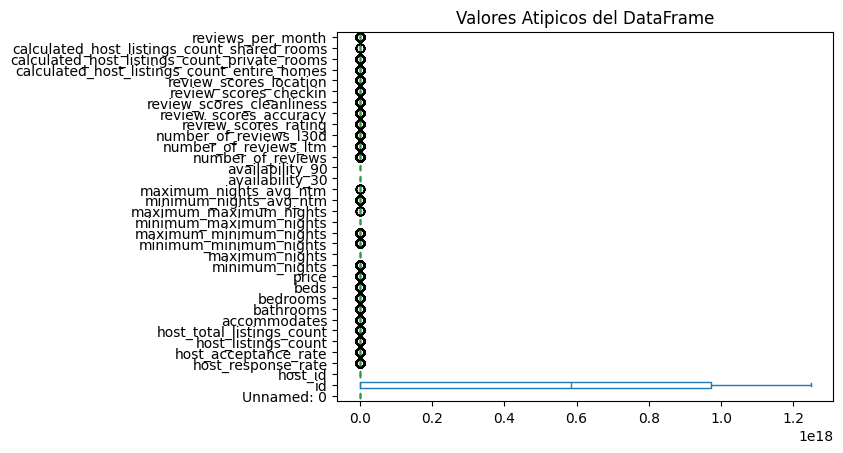

In [ ]:
#Utilizamos funciones para realizar diagramas de caja de bigotes
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()  #Dibujamos el diagrama

In [18]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4293 non-null   int64  
 1   id                                            4293 non-null   int64  
 2   host_id                                       4293 non-null   int64  
 3   host_response_rate                            4293 non-null   float64
 4   host_acceptance_rate                          4293 non-null   float64
 5   host_listings_count                           4293 non-null   int64  
 6   host_total_listings_count                     4293 non-null   int64  
 7   accommodates                                  4293 non-null   int64  
 8   bathrooms                                     4293 non-null   float64
 9   bedrooms                                      4293 non-null   f

DESVIACIÓN ESTÁNDAR PARA ELIMINAR OUTLIERS EN EL DF

In [19]:
y=cuantitativas
#Utilizamos regla empírica (3)
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Unnamed: 0                                      5.864280e+03
id                                              1.944041e+18
host_id                                         6.758019e+08
host_response_rate                              1.255080e+00
host_acceptance_rate                            1.471846e+00
host_listings_count                             4.188463e+03
host_total_listings_count                       4.790490e+03
accommodates                                    1.030476e+01
bathrooms                                       2.810516e+00
bedrooms                                        4.979209e+00
beds                                            5.790727e+00
price                                           8.255230e+02
minimum_nights                                  1.405947e+02
maximum_nights                                  1.886457e+03
minimum_minimum_nights                          1.394521e+02
maximum_minimum_nights                          3.470333e+0

In [20]:
#Obtenemos datos y los outliers se convierten en nulos en el datafame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,3781,4804,1.00,NaN,2.0,6.0,2.0,1.0,1.0,...,0.0,4.96,5.00,4.96,5.00,4.85,1.0,0.0,0.0,0.23
1,1,5506,8229,1.00,0.99,11.0,14.0,2.0,1.0,1.0,...,2.0,4.80,4.88,4.90,4.95,4.57,10.0,0.0,0.0,0.68
2,2,6695,8229,1.00,0.99,11.0,14.0,4.0,1.0,0.0,...,0.0,4.81,4.82,4.87,4.90,4.52,10.0,0.0,0.0,0.72
3,3,8789,26988,1.00,0.49,8.0,32.0,2.0,1.0,1.0,...,0.0,4.69,4.69,4.55,4.93,4.97,4.0,0.0,0.0,0.24
4,4,10811,38997,0.89,0.55,22.0,29.0,3.0,1.0,0.0,...,0.0,4.33,4.44,4.67,4.56,5.00,13.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,4288,1246392949452869888,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,NaN
4289,4289,1246399439387589888,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,NaN
4290,4290,1246403670714170112,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,NaN
4291,4291,1246434133047330048,238931345,1.00,0.95,7.0,7.0,8.0,1.0,4.0,...,0.0,5.00,5.00,5.00,5.00,5.00,2.0,0.0,0.0,NaN


In [21]:
#Corroboramos valores nulos en el df, pero en cuestion de valores atipicos (outliers)
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                                        0
id                                                0
host_id                                           0
host_response_rate                               64
host_acceptance_rate                            153
host_listings_count                             355
host_total_listings_count                        41
accommodates                                     77
bathrooms                                        76
bedrooms                                         99
beds                                            110
price                                            72
minimum_nights                                   26
maximum_nights                                    0
minimum_minimum_nights                           25
maximum_minimum_nights                          338
minimum_maximum_nights                            0
maximum_maximum_nights                           12
minimum_nights_avg_ntm                           28
maximum_nigh

In [22]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,3781,4804,1.00,0.90,2.0,6.0,2.0,1.0,1.0,...,0.0,4.96,5.00,4.96,5.00,4.85,1.0,0.0,0.0,0.23
1,1,5506,8229,1.00,0.99,11.0,14.0,2.0,1.0,1.0,...,2.0,4.80,4.88,4.90,4.95,4.57,10.0,0.0,0.0,0.68
2,2,6695,8229,1.00,0.99,11.0,14.0,4.0,1.0,0.0,...,0.0,4.81,4.82,4.87,4.90,4.52,10.0,0.0,0.0,0.72
3,3,8789,26988,1.00,0.49,8.0,32.0,2.0,1.0,1.0,...,0.0,4.69,4.69,4.55,4.93,4.97,4.0,0.0,0.0,0.24
4,4,10811,38997,0.89,0.55,22.0,29.0,3.0,1.0,0.0,...,0.0,4.33,4.44,4.67,4.56,5.00,13.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,4288,1246392949452869888,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,1.70
4289,4289,1246399439387589888,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,1.70
4290,4290,1246403670714170112,307979339,1.00,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,8.0,0.0,1.70
4291,4291,1246434133047330048,238931345,1.00,0.95,7.0,7.0,8.0,1.0,4.0,...,0.0,5.00,5.00,5.00,5.00,5.00,2.0,0.0,0.0,1.70


In [24]:
#Corroboramos los valores nulos del df LIMPIO
valores_nulos= data_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

CUANTILES PARA SUSTITUIR OUTLIERS EN EL DF

In [25]:
#Método aplicando Cuartiles. Encuentro con 0.25 y 0.75
y=cuantitativas
percentile25= y.quantile(0.25)
percentile75= y.quantile(0.75)
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Unnamed: 0                                      6.438000e+03
id                                              2.430807e+18
host_id                                         7.108378e+08
host_response_rate                              1.000000e+00
host_acceptance_rate                            1.150000e+00
host_listings_count                             2.195000e+02
host_total_listings_count                       3.230000e+02
accommodates                                    7.000000e+00
bathrooms                                       1.500000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           5.175000e+02
minimum_nights                                  7.850000e+01
maximum_nights                                  2.265000e+03
minimum_minimum_nights                          7.600000e+01
maximum_minimum_nights                          1.830000e+0

In [26]:
#Filtramos para eliminar valores atípicos según el método IQR
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,3781,4804,1.0,NaN,2.0,6.0,2.0,1.0,1.0,...,0.0,4.96,5.00,4.96,5.00,4.85,1.0,0.0,0.0,0.23
1,1,5506,8229,1.0,0.99,11.0,14.0,2.0,1.0,1.0,...,2.0,4.80,4.88,4.90,4.95,4.57,10.0,0.0,0.0,0.68
2,2,6695,8229,1.0,0.99,11.0,14.0,4.0,1.0,0.0,...,0.0,4.81,4.82,4.87,4.90,4.52,10.0,0.0,0.0,0.72
3,3,8789,26988,1.0,NaN,8.0,32.0,2.0,1.0,1.0,...,0.0,4.69,4.69,4.55,4.93,4.97,4.0,0.0,0.0,0.24
4,4,10811,38997,NaN,NaN,22.0,29.0,3.0,1.0,0.0,...,0.0,4.33,4.44,4.67,NaN,5.00,13.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,4288,1246392949452869888,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,NaN,0.0,NaN
4289,4289,1246399439387589888,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,NaN,0.0,NaN
4290,4290,1246403670714170112,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,NaN,0.0,NaN
4291,4291,1246434133047330048,238931345,1.0,0.95,7.0,7.0,NaN,1.0,NaN,...,0.0,5.00,5.00,5.00,5.00,5.00,2.0,0.0,0.0,NaN


In [27]:
#Corroboramos valores del df
valores_nulos= data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                        0
id                                                0
host_id                                           0
host_response_rate                              893
host_acceptance_rate                            369
host_listings_count                             633
host_total_listings_count                       649
accommodates                                    277
bathrooms                                       830
bedrooms                                        291
beds                                            348
price                                           252
minimum_nights                                  717
maximum_nights                                    0
minimum_minimum_nights                          713
maximum_minimum_nights                          343
minimum_maximum_nights                            0
maximum_maximum_nights                           12
minimum_nights_avg_ntm                          717
maximum_nigh

In [28]:
#Reemplazamos valores faltantes con la media y creamos una copia
data4_iqr= data3_iqr.copy()
data4_iqr= data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,3781,4804,1.0,1.00,2.0,6.0,2.0,1.0,1.0,...,0.0,4.96,5.00,4.96,5.00,4.85,1.0,0.0,0.0,0.23
1,1,5506,8229,1.0,0.99,11.0,14.0,2.0,1.0,1.0,...,2.0,4.80,4.88,4.90,4.95,4.57,10.0,0.0,0.0,0.68
2,2,6695,8229,1.0,0.99,11.0,14.0,4.0,1.0,0.0,...,0.0,4.81,4.82,4.87,4.90,4.52,10.0,0.0,0.0,0.72
3,3,8789,26988,1.0,1.00,8.0,32.0,2.0,1.0,1.0,...,0.0,4.69,4.69,4.55,4.93,4.97,4.0,0.0,0.0,0.24
4,4,10811,38997,1.0,1.00,22.0,29.0,3.0,1.0,0.0,...,0.0,4.33,4.44,4.67,4.90,5.00,13.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,4288,1246392949452869888,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4289,4289,1246399439387589888,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4290,4290,1246403670714170112,307979339,1.0,0.98,61.0,67.0,2.0,1.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4291,4291,1246434133047330048,238931345,1.0,0.95,7.0,7.0,2.8,1.0,1.2,...,0.0,5.00,5.00,5.00,5.00,5.00,2.0,0.0,0.0,1.60


In [29]:
#Unimos las columnas cualitativas con las numéricas limpias
Datos_Limpios= pd.concat([cualitativas, data4_iqr], axis=1)
Datos_Limpios

,last_scraped,host_name,host_since,host_location,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-09-18,Frank,2008-12-03,"Massachusetts, United States",within a day,t,t,f,Entire rental unit,Entire home/apt,...,0.0,4.96,5.00,4.96,5.00,4.85,1.0,0.0,0.0,0.23
1,2024-09-18,Terry,2009-02-19,"Boston, MA",within an hour,t,t,t,Entire guest suite,Entire home/apt,...,2.0,4.80,4.88,4.90,4.95,4.57,10.0,0.0,0.0,0.68
2,2024-09-18,Terry,2009-02-19,"Boston, MA",within an hour,t,t,t,Entire condo,Entire home/apt,...,0.0,4.81,4.82,4.87,4.90,4.52,10.0,0.0,0.0,0.72
3,2024-09-18,Anne,2009-07-22,"Boston, MA",within a few hours,t,t,t,Entire rental unit,Entire home/apt,...,0.0,4.69,4.69,4.55,4.93,4.97,4.0,0.0,0.0,0.24
4,2024-09-18,Michelle,2009-09-16,"Boston, MA",within a few hours,f,t,t,Entire rental unit,Entire home/apt,...,0.0,4.33,4.44,4.67,4.90,5.00,13.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,2024-09-18,Aziz,2019-11-07,"Newton, MA",within an hour,t,t,t,Private room in rental unit,Private room,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4289,2024-09-18,Aziz,2019-11-07,"Newton, MA",within an hour,t,t,t,Private room in rental unit,Private room,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4290,2024-09-18,Aziz,2019-11-07,"Newton, MA",within an hour,t,t,t,Private room in rental unit,Private room,...,0.0,5.00,5.00,5.00,5.00,5.00,1.0,0.8,0.0,1.60
4291,2024-09-18,Asha,2019-01-25,"Dallas, TX",within an hour,t,t,t,Entire rental unit,Entire home/apt,...,0.0,5.00,5.00,5.00,5.00,5.00,2.0,0.0,0.0,1.60


In [30]:
#Corroboramos los datos
valores_nulos= Datos_Limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [32]:
#Creamos un df con datos limpios
Datos_Limpios.to_csv("País_Datos_Limpios.csv")